In [1]:
import pandas as pd
df=pd.read_csv("deep_cold_storage_risk_dataset.csv")
df

,Timestamp,Sensor_ID,Temperature_C,Humidity_%,System_Load_%,Power_Consumption_kW,Maintenance_Status,Anomaly_Label
0,2025-01-07 21:00:00,Sensor_6,-25.759679,55.242009,58.976198,8.772117,0,0
1,2025-02-17 12:30:00,Sensor_2,-17.878752,52.058626,48.485642,7.891476,0,0
2,2025-01-06 08:45:00,Sensor_10,-21.184555,54.324246,73.613742,6.676019,0,0
3,2025-01-08 11:45:00,Sensor_5,-23.987871,50.847140,74.853642,6.605811,1,0
4,2025-01-02 18:45:00,Sensor_10,-21.830423,52.121253,63.794288,3.976551,0,0
...,...,...,...,...,...,...,...,...
4995,2025-01-18 18:45:00,Sensor_8,-22.679830,44.538609,61.953257,8.431382,0,0
4996,2025-02-08 04:00:00,Sensor_7,-24.720769,54.505027,73.730242,9.346951,0,0
4997,2025-02-13 04:00:00,Sensor_4,-21.207191,46.666076,68.287312,7.188255,0,0
4998,2025-02-20 05:30:00,Sensor_3,-19.413122,56.877298,71.510464,7.374555,0,0


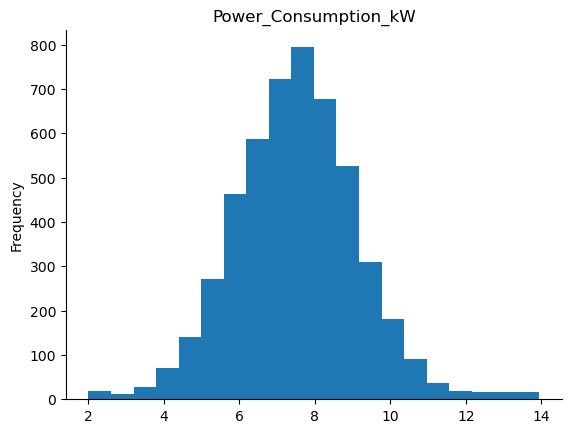

In [2]:
# @title Power_Consumption_kW

from matplotlib import pyplot as plt
df['Power_Consumption_kW'].plot(kind='hist', bins=20, title='Power_Consumption_kW')
plt.gca().spines[['top', 'right',]].set_visible(False)

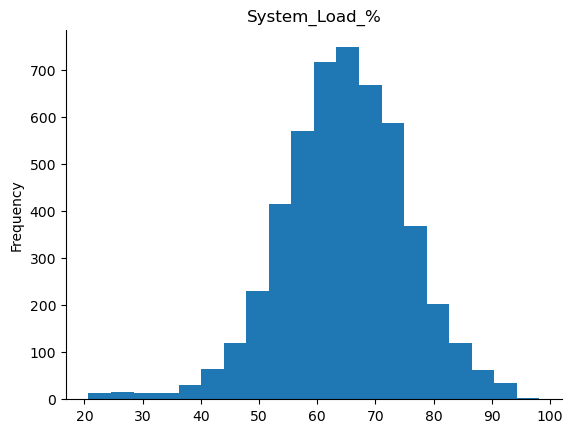

In [3]:
# @title System_Load_%

from matplotlib import pyplot as plt
df['System_Load_%'].plot(kind='hist', bins=20, title='System_Load_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

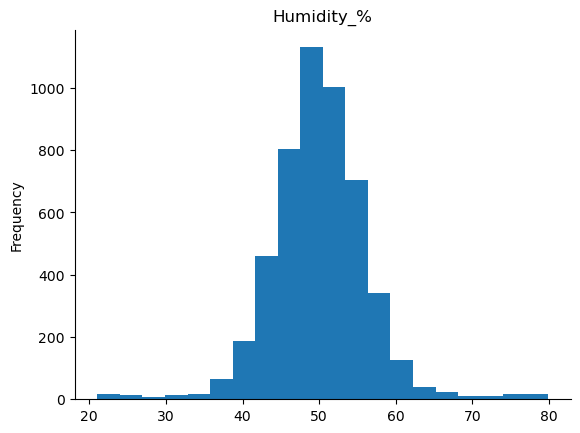

In [4]:
# @title Humidity_%

from matplotlib import pyplot as plt
df['Humidity_%'].plot(kind='hist', bins=20, title='Humidity_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

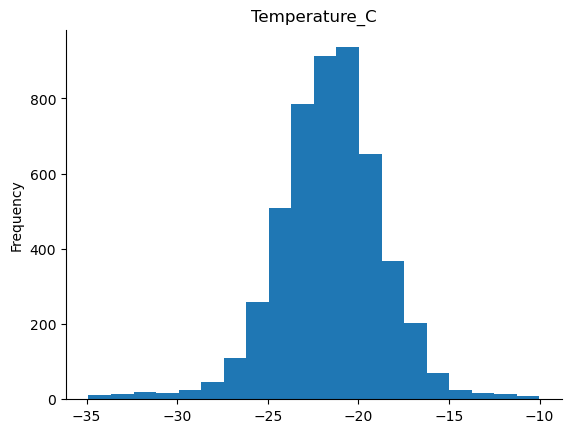

In [5]:
# @title Temperature_C

from matplotlib import pyplot as plt
df['Temperature_C'].plot(kind='hist', bins=20, title='Temperature_C')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             5000 non-null   object 
 1   Sensor_ID             5000 non-null   object 
 2   Temperature_C         5000 non-null   float64
 3   Humidity_%            5000 non-null   float64
 4   System_Load_%         5000 non-null   float64
 5   Power_Consumption_kW  5000 non-null   float64
 6   Maintenance_Status    5000 non-null   int64  
 7   Anomaly_Label         5000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 312.6+ KB


In [7]:
df.describe()

,Temperature_C,Humidity_%,System_Load_%,Power_Consumption_kW,Maintenance_Status,Anomaly_Label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-21.559782,50.018201,64.624631,7.518776,0.154000,0.082200
std,2.940246,6.302347,10.758716,1.642619,0.360985,0.274697
min,-34.902041,21.037639,20.684789,2.002160,0.000000,0.000000
25%,-23.261100,46.479750,57.964866,6.432001,0.000000,0.000000
50%,-21.490093,49.912960,64.783281,7.514188,0.000000,0.000000
75%,-19.794859,53.544933,71.710918,8.533274,0.000000,0.000000
max,-10.013483,79.890484,98.176871,13.946987,1.000000,1.000000


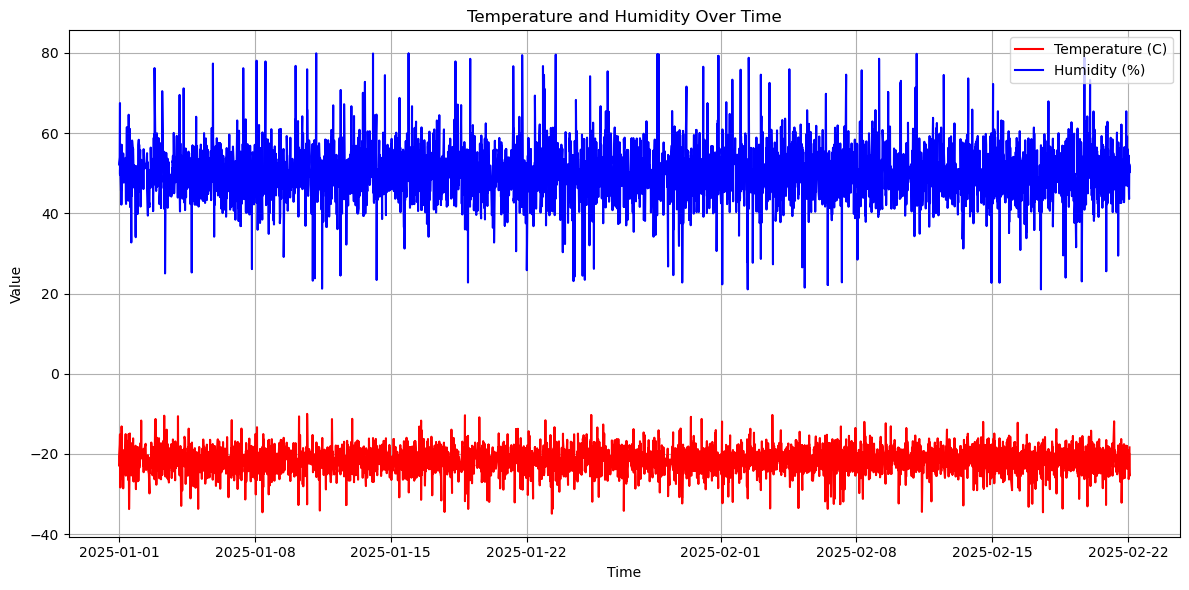

In [8]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df = df.sort_values(by="Timestamp")
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["Temperature_C"], label="Temperature (C)", color="red")
plt.plot(df["Timestamp"], df["Humidity_%"], label="Humidity (%)", color="blue")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Temperature and Humidity Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

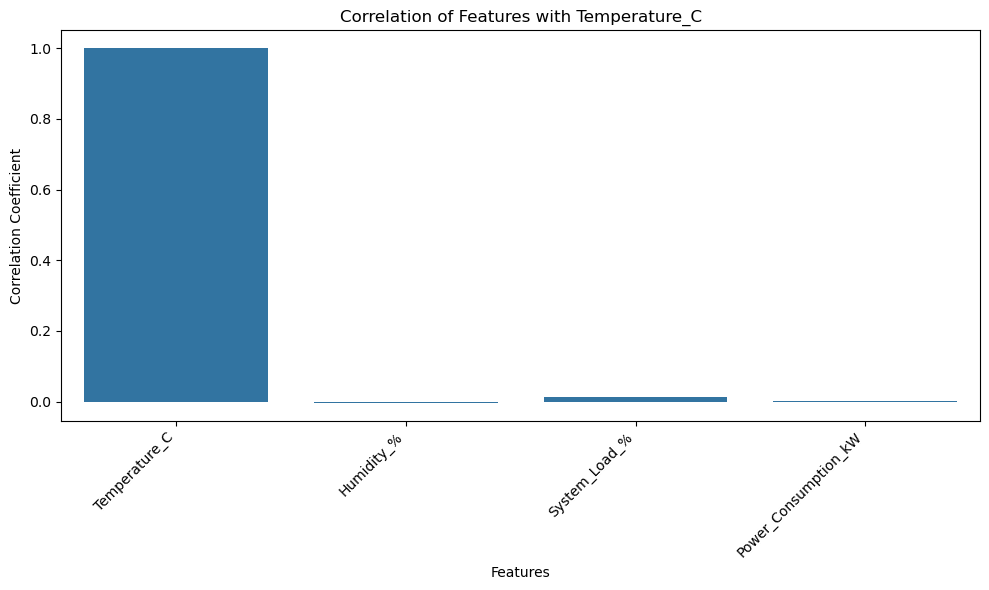

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df[['Temperature_C', 'Humidity_%', 'System_Load_%', 'Power_Consumption_kW']]
corr_matrix = numerical_df.corr()
corr_with_maintenance = corr_matrix.iloc[:,0]
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_maintenance.index, y=corr_with_maintenance.values)
plt.title('Correlation of Features with Temperature_C')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
features = ["Temperature_C", "Humidity_%", "System_Load_%", "Power_Consumption_kW"]

# Scale features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Separate features and target
X = df[features]
y = df["Maintenance_Status"]

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split balanced data for model training
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train XGBoost for maintenance prediction
xgb_maint = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_maint.fit(X_train, y_train)
y_pred = xgb_maint.predict(X_test)

# Evaluate Machine Maintenance Model
maintenance_accuracy = accuracy_score(y_test, y_pred)
maintenance_report = classification_report(y_test, y_pred)
print(f"Machine Maintenance Model Accuracy: {maintenance_accuracy:.4f}")
print("Classification Report:\n", maintenance_report)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Machine Maintenance Model Accuracy: 0.7222
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       862
           1       0.72      0.71      0.72       830

    accuracy                           0.72      1692
   macro avg       0.72      0.72      0.72      1692
weighted avg       0.72      0.72      0.72      1692



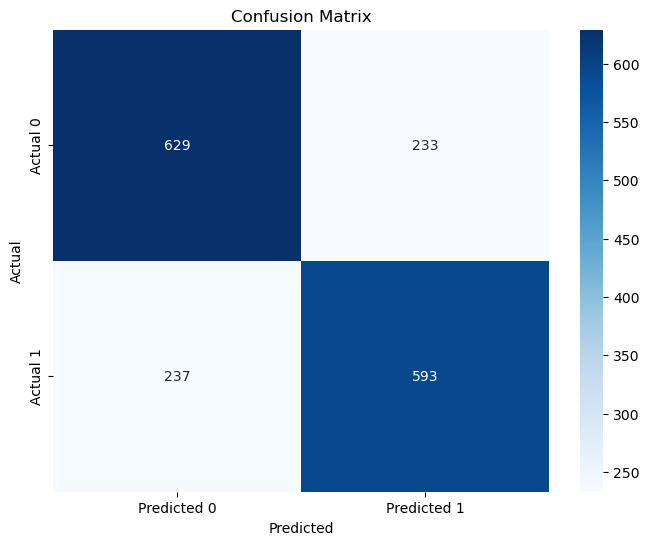

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import IsolationForest


X_anomaly = df.drop(columns=["Timestamp","Sensor_ID","Anomaly_Label", "Maintenance_Status"])
scaler_anomaly = MinMaxScaler()
X_anomaly_scaled = scaler_anomaly.fit_transform(X_anomaly)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["Anomaly_Score"] = iso_forest.fit_predict(X_anomaly_scaled)
df["Anomaly_Detected"] = (df["Anomaly_Score"] == -1).astype(int)



In [14]:
print("Anomalous data points:")
anomalies=df[df["Anomaly_Detected"]==1]
anomalies=anomalies[["Timestamp","Sensor_ID","Temperature_C", "Humidity_%", "System_Load_%", "Power_Consumption_kW"]]
anomalies

Anomalous data points:


,Timestamp,Sensor_ID,Temperature_C,Humidity_%,System_Load_%,Power_Consumption_kW
263,2025-01-01 01:00:00,Sensor_2,2.195710,2.772856,0.662044,-0.673984
106,2025-01-01 03:00:00,Sensor_1,2.867031,0.832242,2.507551,-1.377766
2890,2025-01-01 07:00:00,Sensor_7,-1.153241,-0.022501,-0.806615,3.519026
2472,2025-01-01 11:45:00,Sensor_6,2.222380,2.311586,-2.194001,0.026744
2721,2025-01-01 19:45:00,Sensor_5,0.012580,0.156156,1.993296,-2.610058
...,...,...,...,...,...,...
4581,2025-02-20 21:00:00,Sensor_7,1.713860,-3.878977,-0.399714,0.657458
4798,2025-02-21 06:45:00,Sensor_9,3.296520,0.462263,-0.902423,-0.787595
4561,2025-02-21 11:45:00,Sensor_10,0.722767,-3.264352,-0.852481,-1.109370
4799,2025-02-21 12:00:00,Sensor_1,0.459922,1.217097,-1.272569,-3.052722


Accuracy of anomaly detection : 0.9510


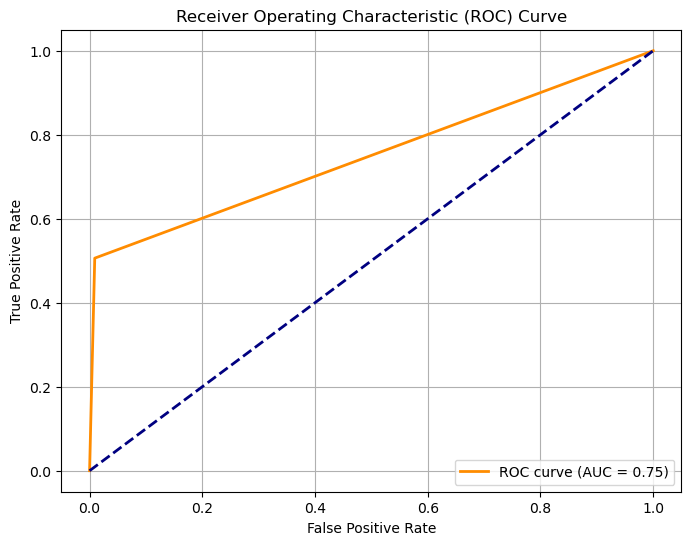

In [15]:
# Evaluate with a labeled dataset
from sklearn.metrics import accuracy_score, roc_curve, auc
if 'Anomaly_Label' in df.columns:
    y_true = df['Anomaly_Label']
    y_pred = (df['Anomaly_Score'] == -1).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy of anomaly detection : {accuracy:.4f}")

    fpr, tpr, thresholds = roc_curve(y_true, -df['Anomaly_Score']) # Note the negative sign to scores
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
        print("Skipping ROC Curve and Accuracy Score")
        print("Note: 'Anomaly_Label' column not found for evaluation. ")